# Chronos Usage Guide for QuestradeAPI
Chronos is a powerful data management component of the QuestradeAPI package that handles:
 
 - Symbol information caching and persistence
 - Market data (candles) retrieval and storage
 - Efficient database operations for financial data
 
 This notebook demonstrates key functionality of the Chronos class.

In [1]:
# Import necessary libraries
from QuestradeAPI import QuestradeAPI, Chronos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Set up the API connection and Chronos instance
api = QuestradeAPI()  # Handles authentication automatically
chronos = Chronos(api=api)  # Data caching and persistence layer

## 1. Symbol Information Management
Chronos efficiently manages symbol information with local caching.

In [2]:
# Retrieve information for a single symbol
aapl_info = chronos.get_symbol_info("AAPL")
print(f"Symbol data for AAPL:")
pd.DataFrame([aapl_info])

Symbol AAPL not found in database, fetching from API...
Saved AAPL to database at C:\Users\yaloo\QuestradeCustomWrapper\data\symbols.db
Symbol data for AAPL:


,symbol,symbolId,description,securityType,listingExchange,isTradable,isQuotable,currency
0,AAPL,8049,APPLE INC,Stock,NASDAQ,True,True,USD


In [3]:
# Get database statistics to see what's stored locally
db_stats = chronos.get_db_stats()
print(f"Total symbols in database: {db_stats['total_symbols']}")
print("\nBreakdown by security type:")
for security_type, count in db_stats.get('by_security_type', {}).items():
    print(f"  {security_type}: {count}")

print("\nBreakdown by exchange:")
for exchange, count in db_stats.get('by_exchange', {}).items():
    print(f"  {exchange}: {count}")

Total symbols in database: 1

Breakdown by security type:
  Stock: 1

Breakdown by exchange:
  NASDAQ: 1


## 2. Bulk Operations for Symbol Management

In [4]:
# Define a list of tech symbols
tech_symbols = ["MSFT", "GOOGL", "META", "NVDA", "AMD", "INTC", "CSCO", "ORCL"]

# Bulk insert symbols (fetches complete information for each symbol)
chronos.bulk_insert_symbols(tech_symbols)

Found information for MSFT
Found information for GOOGL
Found information for META
Found information for NVDA
Found information for AMD
Found information for INTC
Found information for CSCO
Found information for ORCL
Successfully inserted 8 symbols


8

In [5]:
# Check for stale symbols and update them
# This updates any symbols that haven't been refreshed in 30 days
chronos.update_stale_symbols(days_threshold=30)

In [6]:
# Get all symbols stored in the database
all_symbols = chronos.get_all_symbols()
print(f"Retrieved {len(all_symbols)} symbols from database")
symbols_df = pd.DataFrame(all_symbols)
symbols_df.head()

Retrieved 9 symbols from the database.
Retrieved 9 symbols from database


,symbolId,symbol,description,securityType,listingExchange,isTradable,isQuotable,currency
0,6770,AMD,ADVANCED MICRO DEVICES INC,Stock,NASDAQ,1,1,USD
1,8049,AAPL,APPLE INC,Stock,NASDAQ,1,1,USD
2,13648,CSCO,CISCO SYSTEMS INC,Stock,NASDAQ,1,1,USD
3,23205,INTC,INTEL CORP,Stock,NASDAQ,1,1,USD
4,27426,MSFT,MICROSOFT CORP,Stock,NASDAQ,1,1,USD


## 3. Market Data (Candles) Retrieval and Storage

In [7]:
# Get candle data for Apple with default parameters
# This retrieves 90 days of one-minute candles by default
aapl_candles = chronos.get_candles(symbol="AAPL")
print(f"Retrieved {len(aapl_candles)} candle records for AAPL")
aapl_candles.head()

Symbol AAPL found in cache
No data exists for AAPL with interval OneMinute. Fetching 90 days of data.
Saved 20000 new candles to database
Retrieved 20000 candles for AAPL
Retrieved 20000 candle records for AAPL


,symbol,start,end,low,high,open,close,volume,VWAP
0,AAPL,2024-12-23 09:28:00+00:00,2024-12-23 09:29:00+00:00,255.59,255.59,255.59,255.59,232,255.577901
1,AAPL,2024-12-23 09:30:00+00:00,2024-12-23 09:31:00+00:00,255.49,255.61,255.54,255.61,400,255.554710
2,AAPL,2024-12-23 09:34:00+00:00,2024-12-23 09:35:00+00:00,255.52,255.57,255.57,255.52,810,255.559809
3,AAPL,2024-12-23 09:37:00+00:00,2024-12-23 09:38:00+00:00,255.63,255.63,255.63,255.63,270,255.569315
4,AAPL,2024-12-23 09:38:00+00:00,2024-12-23 09:39:00+00:00,255.73,255.73,255.73,255.73,100,255.580754


In [8]:
# Get daily candles for a different time period
msft_daily = chronos.get_candles(
    symbol="MSFT", 
    days=365,  # Get a year of data
    interval="OneMinute" # OneMinute, FiveMinute, FifteenMinute, ThirtyMinute, OneHour, OneDay..
)
print(f"Retrieved {len(msft_daily)} daily candles for MSFT")
msft_daily.head()

Symbol MSFT found in cache
No data exists for MSFT with interval OneMinute. Fetching 365 days of data.
Saved 20000 new candles to database
Retrieved 20000 candles for MSFT
Retrieved 20000 daily candles for MSFT


,symbol,start,end,low,high,open,close,volume,VWAP
0,MSFT,2024-12-23 09:36:00+00:00,2024-12-23 09:37:00+00:00,438.01,438.29,438.29,438.01,777,437.908779
1,MSFT,2024-12-23 09:40:00+00:00,2024-12-23 09:41:00+00:00,437.84,437.84,437.84,437.84,100,437.910112
2,MSFT,2024-12-23 10:18:00+00:00,2024-12-23 10:19:00+00:00,437.77,437.77,437.77,437.77,100,437.915606
3,MSFT,2024-12-23 10:25:00+00:00,2024-12-23 10:26:00+00:00,437.34,437.34,437.34,437.34,100,437.823465
4,MSFT,2024-12-23 10:27:00+00:00,2024-12-23 10:28:00+00:00,437.27,437.30,437.27,437.30,500,437.780235


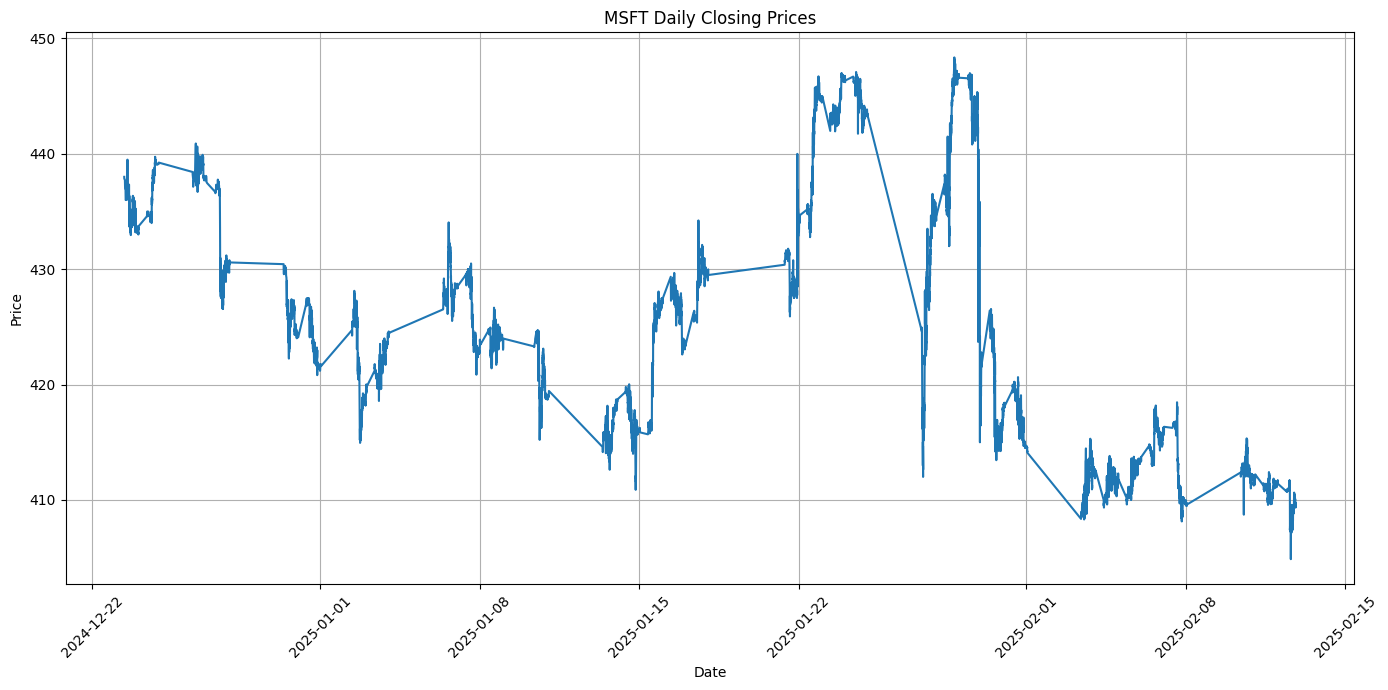

In [9]:
# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(msft_daily['start'], msft_daily['close'])
plt.title('MSFT Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Efficient Data Updates

The `get_updated_candles` method is more efficient than `get_candles` because it:
 - Only fetches new data since the last update
 - Automatically merges with existing data
 - Returns a consistent format each time

In [10]:
# Get updated candles for AAPL
# This will fetch only the new data since the last update
aapl_updated = chronos.get_updated_candles(
    symbol="AAPL", 
    interval="OneMinute",
    as_dataframe=True
)
print(f"AAPL dataframe shape: {aapl_updated.shape}")
aapl_updated.head()

Symbol AAPL found in cache
Data exists for AAPL. Fetching new data since 2025-02-04T16:04:00.000000-05:00
Saved 20000 new candles to database
AAPL dataframe shape: (40000, 9)


,symbol,start,end,low,high,open,close,volume,VWAP
0,AAPL,2024-12-23 09:28:00+00:00,2024-12-23 09:29:00+00:00,255.59,255.59,255.59,255.59,232,255.577901
1,AAPL,2024-12-23 09:30:00+00:00,2024-12-23 09:31:00+00:00,255.49,255.61,255.54,255.61,400,255.554710
2,AAPL,2024-12-23 09:34:00+00:00,2024-12-23 09:35:00+00:00,255.52,255.57,255.57,255.52,810,255.559809
3,AAPL,2024-12-23 09:37:00+00:00,2024-12-23 09:38:00+00:00,255.63,255.63,255.63,255.63,270,255.569315
4,AAPL,2024-12-23 09:38:00+00:00,2024-12-23 09:39:00+00:00,255.73,255.73,255.73,255.73,100,255.580754


In [ ]:
# Get updated candles for multiple symbols
symbols_to_update = ["AAPL", "MSFT", "GOOGL", "NVDA"]
symbol_data = {}

for symbol in symbols_to_update:
    symbol_data[symbol] = chronos.get_updated_candles(
        symbol=symbol, 
        interval="OneMinute",  # OneMinute, FiveMinute, FifteenMinute, ThirtyMinute, OneHour, OneDay..
        as_dataframe=True
    )
    print(f"Retrieved {len(symbol_data[symbol])} daily candles for {symbol}")


Symbol AAPL found in cache
No data exists for AAPL. Fetching 90 days of data.
Saved 60 new candles to database
Retrieved 60 daily candles for AAPL
Symbol MSFT found in cache
No data exists for MSFT. Fetching 90 days of data.
Saved 60 new candles to database
Retrieved 60 daily candles for MSFT
Symbol GOOGL found in cache
No data exists for GOOGL. Fetching 90 days of data.
Saved 60 new candles to database
Retrieved 60 daily candles for GOOGL
Symbol NVDA found in cache
No data exists for NVDA. Fetching 90 days of data.
Saved 60 new candles to database
Retrieved 60 daily candles for NVDA


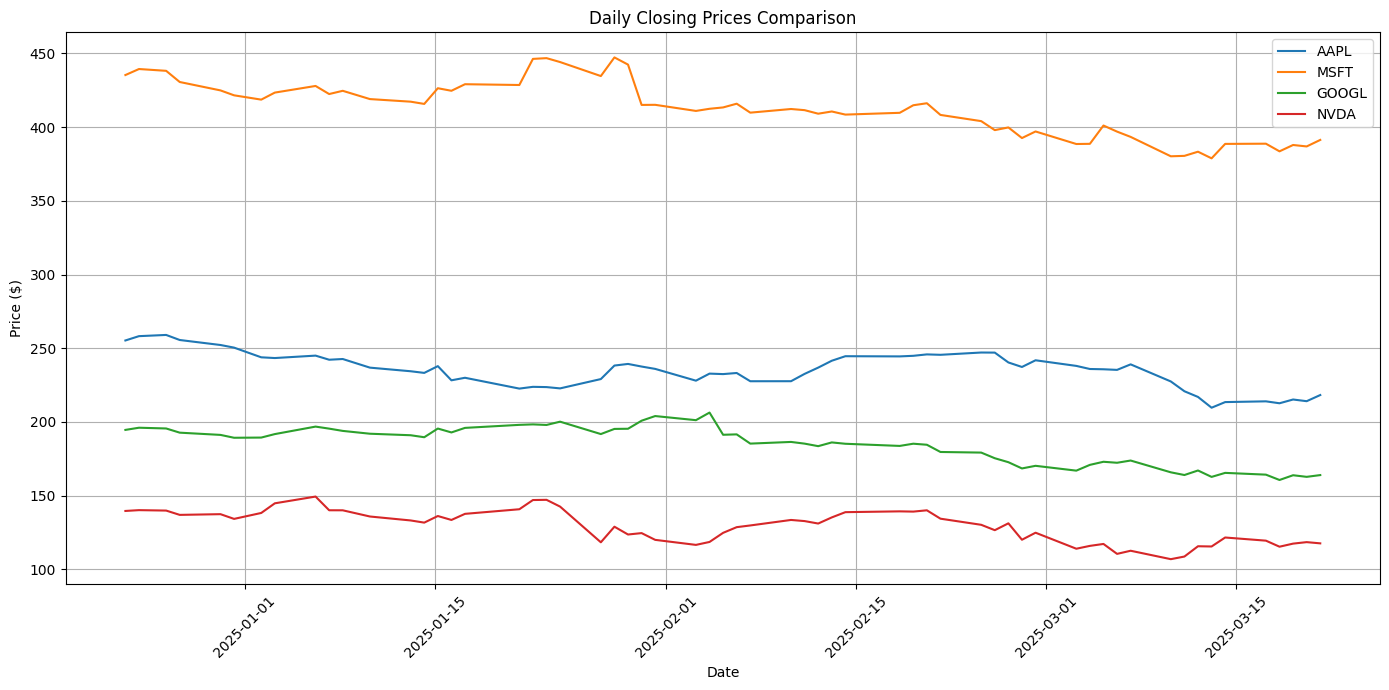

In [12]:
# Plot closing prices for all symbols on the same chart
plt.figure(figsize=(14, 7))

for symbol, df in symbol_data.items():
    # Ensure the data is sorted by date
    df = df.sort_values('start')
    plt.plot(df['start'], df['close'], label=symbol)

plt.title('Daily Closing Prices Comparison')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5. Advanced Data Queries

In [15]:
# Search for specific date ranges of candles without making API calls
start_date = "2025-01-01"
end_date = "2025-03-31"

q1_data = chronos.search_candles_from_db(
    symbol="AAPL",
    start_date=start_date,
    end_date=end_date,
    interval="OneDay"
)
q1_data

{'candles': [{'symbol': 'AAPL',
   'start': '2025-01-02T00:00:00.000000-05:00',
   'end': '2025-01-03T00:00:00.000000-05:00',
   'low': 241.8201,
   'high': 249.1,
   'open': 248.93,
   'close': 243.85,
   'volume': 55740731,
   'VWAP': 244.334502},
  {'symbol': 'AAPL',
   'start': '2025-01-03T00:00:00.000000-05:00',
   'end': '2025-01-04T00:00:00.000000-05:00',
   'low': 241.89,
   'high': 244.18,
   'open': 243.36,
   'close': 243.36,
   'volume': 40244114,
   'VWAP': 243.069132},
  {'symbol': 'AAPL',
   'start': '2025-01-06T00:00:00.000000-05:00',
   'end': '2025-01-07T00:00:00.000000-05:00',
   'low': 243.2,
   'high': 247.33,
   'open': 244.31,
   'close': 245.0,
   'volume': 45045571,
   'VWAP': 245.239844},
  {'symbol': 'AAPL',
   'start': '2025-01-07T00:00:00.000000-05:00',
   'end': '2025-01-08T00:00:00.000000-05:00',
   'low': 241.35,
   'high': 245.55,
   'open': 242.98,
   'close': 242.21,
   'volume': 40855960,
   'VWAP': 243.011289},
  {'symbol': 'AAPL',
   'start': '2025

In [16]:
# Convert to DataFrame for easier manipulation
q1_df = pd.DataFrame(q1_data['candles'])
print(f"Retrieved {len(q1_df)} candles for AAPL between {start_date} and {end_date}")
q1_df.head()


Retrieved 54 candles for AAPL between 2025-01-01 and 2025-03-31


,symbol,start,end,low,high,open,close,volume,VWAP
0,AAPL,2025-01-02T00:00:00.000000-05:00,2025-01-03T00:00:00.000000-05:00,241.8201,249.1000,248.93,243.85,55740731,244.334502
1,AAPL,2025-01-03T00:00:00.000000-05:00,2025-01-04T00:00:00.000000-05:00,241.8900,244.1800,243.36,243.36,40244114,243.069132
2,AAPL,2025-01-06T00:00:00.000000-05:00,2025-01-07T00:00:00.000000-05:00,243.2000,247.3300,244.31,245.00,45045571,245.239844
3,AAPL,2025-01-07T00:00:00.000000-05:00,2025-01-08T00:00:00.000000-05:00,241.3500,245.5500,242.98,242.21,40855960,243.011289
4,AAPL,2025-01-08T00:00:00.000000-05:00,2025-01-09T00:00:00.000000-05:00,240.0500,243.7123,241.92,242.70,37628940,242.273331


## 6. Getting All Market Data for Analysis

In [18]:
# Retrieve all market data stored in the database
all_market_data = chronos.get_all_market_data(as_dataframe=True)
print(f"Retrieved a total of {len(all_market_data)} candle records for all symbols")
all_market_data

Converted start column to dtype: datetime64[ns]
Converted end column to dtype: datetime64[ns]
Retrieved 60240 total candles across all symbols
Retrieved a total of 60240 candle records for all symbols


,symbol,start,end,low,high,open,close,volume,VWAP,interval
0,AAPL,2024-12-23 05:00:00,2024-12-24 05:00:00,253.45,255.650,254.77,255.27,40858774,254.713964,OneDay
1,AAPL,2024-12-23 09:28:00,2024-12-23 09:29:00,255.59,255.590,255.59,255.59,232,255.577901,OneMinute
2,AAPL,2024-12-23 09:30:00,2024-12-23 09:31:00,255.49,255.610,255.54,255.61,400,255.554710,OneMinute
3,AAPL,2024-12-23 09:34:00,2024-12-23 09:35:00,255.52,255.570,255.57,255.52,810,255.559809,OneMinute
4,AAPL,2024-12-23 09:37:00,2024-12-23 09:38:00,255.63,255.630,255.63,255.63,270,255.569315,OneMinute
...,...,...,...,...,...,...,...,...,...,...
60235,NVDA,2025-03-17 04:00:00,2025-03-18 04:00:00,118.03,122.890,122.74,119.53,255501481,120.042296,OneDay
60236,NVDA,2025-03-18 04:00:00,2025-03-19 04:00:00,114.54,119.020,118.00,115.43,299686944,116.452278,OneDay
60237,NVDA,2025-03-19 04:00:00,2025-03-20 04:00:00,115.68,120.445,117.27,117.52,273426225,117.886134,OneDay
60238,NVDA,2025-03-20 04:00:00,2025-03-21 04:00:00,116.47,120.200,116.55,118.53,248829749,118.686583,OneDay


In [19]:
# Get summary statistics by symbol
symbol_counts = all_market_data.groupby('symbol').size()
print("\nNumber of candle records per symbol:")
print(symbol_counts)


Number of candle records per symbol:
symbol
AAPL     40060
GOOGL       60
MSFT     20060
NVDA        60
dtype: int64


In [20]:
# Analyze trading volume by symbol
# Group by symbol and calculate average daily volume
volume_analysis = all_market_data.groupby('symbol')['volume'].agg(['mean', 'median', 'max'])
volume_analysis = volume_analysis.sort_values('mean', ascending=False)
print("Volume analysis by symbol:")
volume_analysis.head(10)

Volume analysis by symbol:


,mean,median,max
symbol,,,
NVDA,2.720171e+08,250105443.0,818830894
GOOGL,2.915024e+07,27786718.5,70461770
AAPL,1.295728e+05,23132.5,101075128
MSFT,8.821538e+04,8776.0,54586260


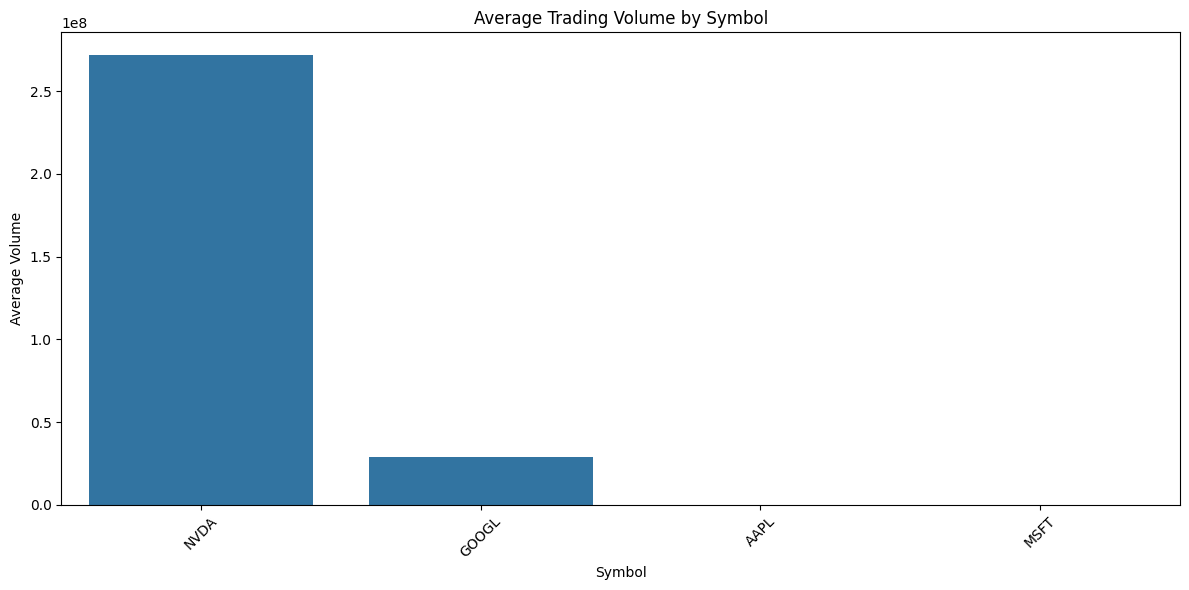

In [21]:
# Plot average volume for top 10 symbols by volume
top_symbols = volume_analysis.head(10).index
plt.figure(figsize=(12, 6))
sns.barplot(x=top_symbols, y=volume_analysis.loc[top_symbols, 'mean'])
plt.title('Average Trading Volume by Symbol')
plt.xlabel('Symbol')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Database Maintenance

In [22]:
# Optimize the database (runs VACUUM operation)
chronos.optimize_db()

Database optimized


In [23]:
# Clear the symbol cache if needed
chronos.clear_symbol_cache()

## 8. Preparing Data for Machine Learning
Chronos data can be easily formatted for machine learning libraries.

In [34]:
# Convert to TimeSeriesDataFrame for use with AutoGluon
from autogluon.timeseries import TimeSeriesDataFrame

# Extract daily data for multiple symbols
symbols_for_ml = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]
daily_data = []

for symbol in symbols_for_ml:
    # Get daily data - using OneDay interval instead of OneMinute for better model training
    data = chronos.get_candles(symbol=symbol, interval="OneMinute")
    
    # Add symbol identifier
    data['symbol'] = symbol
    
    # Clean the timestamp column by removing timezone information
    # This is critical because AutoGluon requires timestamp without timezone info
    if not data.empty:
        # First make sure timestamps are datetime objects
        data['start'] = pd.to_datetime(data['start'], utc=True)
        # Then remove timezone information
        data['start'] = data['start'].dt.tz_localize(None)
    
    daily_data.append(data)

# Combine all data
combined_data = pd.concat(daily_data, ignore_index=True)

# Verify the dtype before conversion
print(f"Timestamp column dtype: {combined_data['start'].dtype}")
print(f"Sample timestamp value: {combined_data['start'].iloc[0]}")

# Convert to TimeSeriesDataFrame
ts_data = TimeSeriesDataFrame.from_data_frame(
    combined_data,
    id_column="symbol",
    timestamp_column="start"
)

print(f"Created TimeSeriesDataFrame with shape: {ts_data.shape}")
print(f"Number of unique time series: {ts_data.num_items}")
ts_data.head()

Symbol AAPL found in cache
Using cached data for AAPL with interval OneMinute
Retrieved 42134 candles for AAPL
Symbol MSFT found in cache
Using cached data for MSFT with interval OneMinute
Retrieved 35298 candles for MSFT
Symbol GOOGL found in cache
Using cached data for GOOGL with interval OneMinute
Retrieved 38684 candles for GOOGL
Symbol AMZN found in cache
Using cached data for AMZN with interval OneMinute
Retrieved 42067 candles for AMZN
Symbol META found in cache
Using cached data for META with interval OneMinute
Retrieved 34785 candles for META
Timestamp column dtype: datetime64[ns]
Sample timestamp value: 2024-12-23 09:28:00
Created TimeSeriesDataFrame with shape: (192968, 7)
Number of unique time series: 5


end     low    high    open  \
item_id timestamp                                                               
AAPL    2024-12-23 09:28:00 2024-12-23 09:29:00+00:00  255.59  255.59  255.59   
        2024-12-23 09:30:00 2024-12-23 09:31:00+00:00  255.49  255.61  255.54   
        2024-12-23 09:34:00 2024-12-23 09:35:00+00:00  255.52  255.57  255.57   
        2024-12-23 09:37:00 2024-12-23 09:38:00+00:00  255.63  255.63  255.63   
        2024-12-23 09:38:00 2024-12-23 09:39:00+00:00  255.73  255.73  255.73   

                              close  volume        VWAP  
item_id timestamp                                        
AAPL    2024-12-23 09:28:00  255.59     232  255.577901  
        2024-12-23 09:30:00  255.61     400  255.554710  
        2024-12-23 09:34:00  255.52     810  255.559809  
        2024-12-23 09:37:00  255.63     270  255.569315  
        2024-12-23 09:38:00  255.73     100  255.580754

## 9. Custom Technical Indicators
You can easily enhance Chronos data with technical indicators.

In [35]:
# Import technical analysis library
from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

Symbol MSFT found in cache
Using cached data for MSFT with interval OneMinute
Retrieved 35298 candles for MSFT


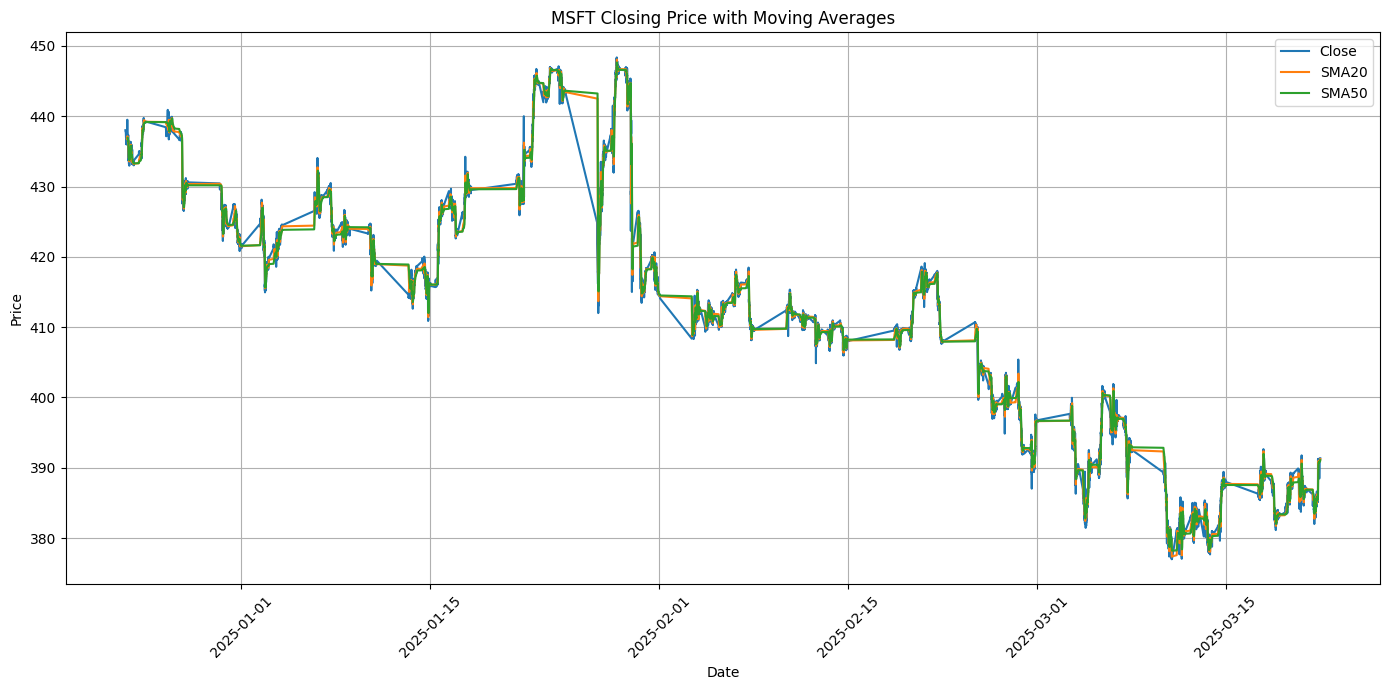

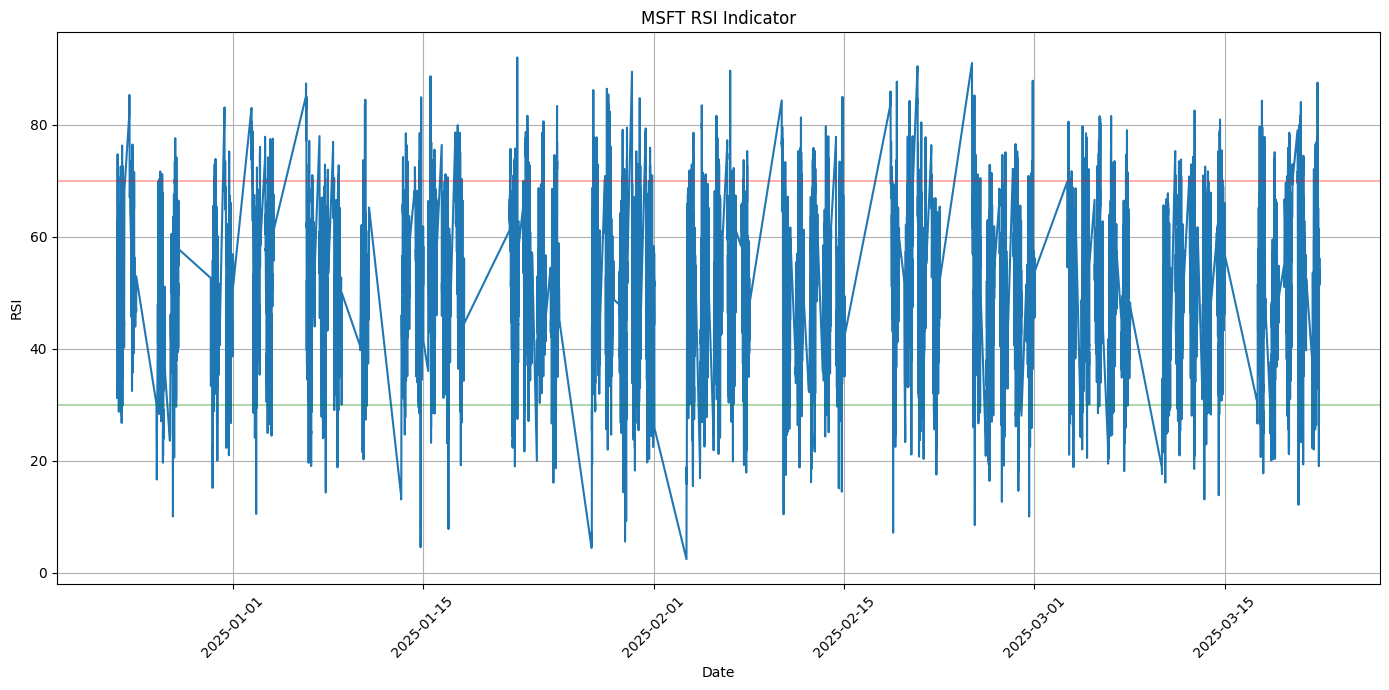

In [37]:
# Get MSFT data for analysis
msft_data = chronos.get_candles(symbol="MSFT", interval="OneMinute")

# Add technical indicators
# Simple Moving Averages
msft_data['sma20'] = SMAIndicator(close=msft_data['close'], window=20).sma_indicator()
msft_data['sma50'] = SMAIndicator(close=msft_data['close'], window=50).sma_indicator()

# MACD
macd = MACD(close=msft_data['close'])
msft_data['macd'] = macd.macd()
msft_data['macd_signal'] = macd.macd_signal()
msft_data['macd_diff'] = macd.macd_diff()

# RSI
msft_data['rsi'] = RSIIndicator(close=msft_data['close']).rsi()

# Bollinger Bands
bollinger = BollingerBands(close=msft_data['close'])
msft_data['bb_high'] = bollinger.bollinger_hband()
msft_data['bb_low'] = bollinger.bollinger_lband()
msft_data['bb_mid'] = bollinger.bollinger_mavg()

# Display the data with indicators
msft_data.tail()

# %%
# Plot closing price with SMA20 and SMA50
plt.figure(figsize=(14, 7))
plt.plot(msft_data['start'], msft_data['close'], label='Close')
plt.plot(msft_data['start'], msft_data['sma20'], label='SMA20')
plt.plot(msft_data['start'], msft_data['sma50'], label='SMA50')
plt.title('MSFT Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %%
# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(msft_data['start'], msft_data['rsi'])
plt.axhline(y=70, color='r', linestyle='-', alpha=0.3)
plt.axhline(y=30, color='g', linestyle='-', alpha=0.3)
plt.title('MSFT RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Putting It All Together: Building a Simple Dashboard
Let's create a simple dashboard to visualize key metrics for a symbol.

Symbol MSFT found in cache
Using cached data for MSFT with interval OneMinute
Retrieved 35298 candles for MSFT


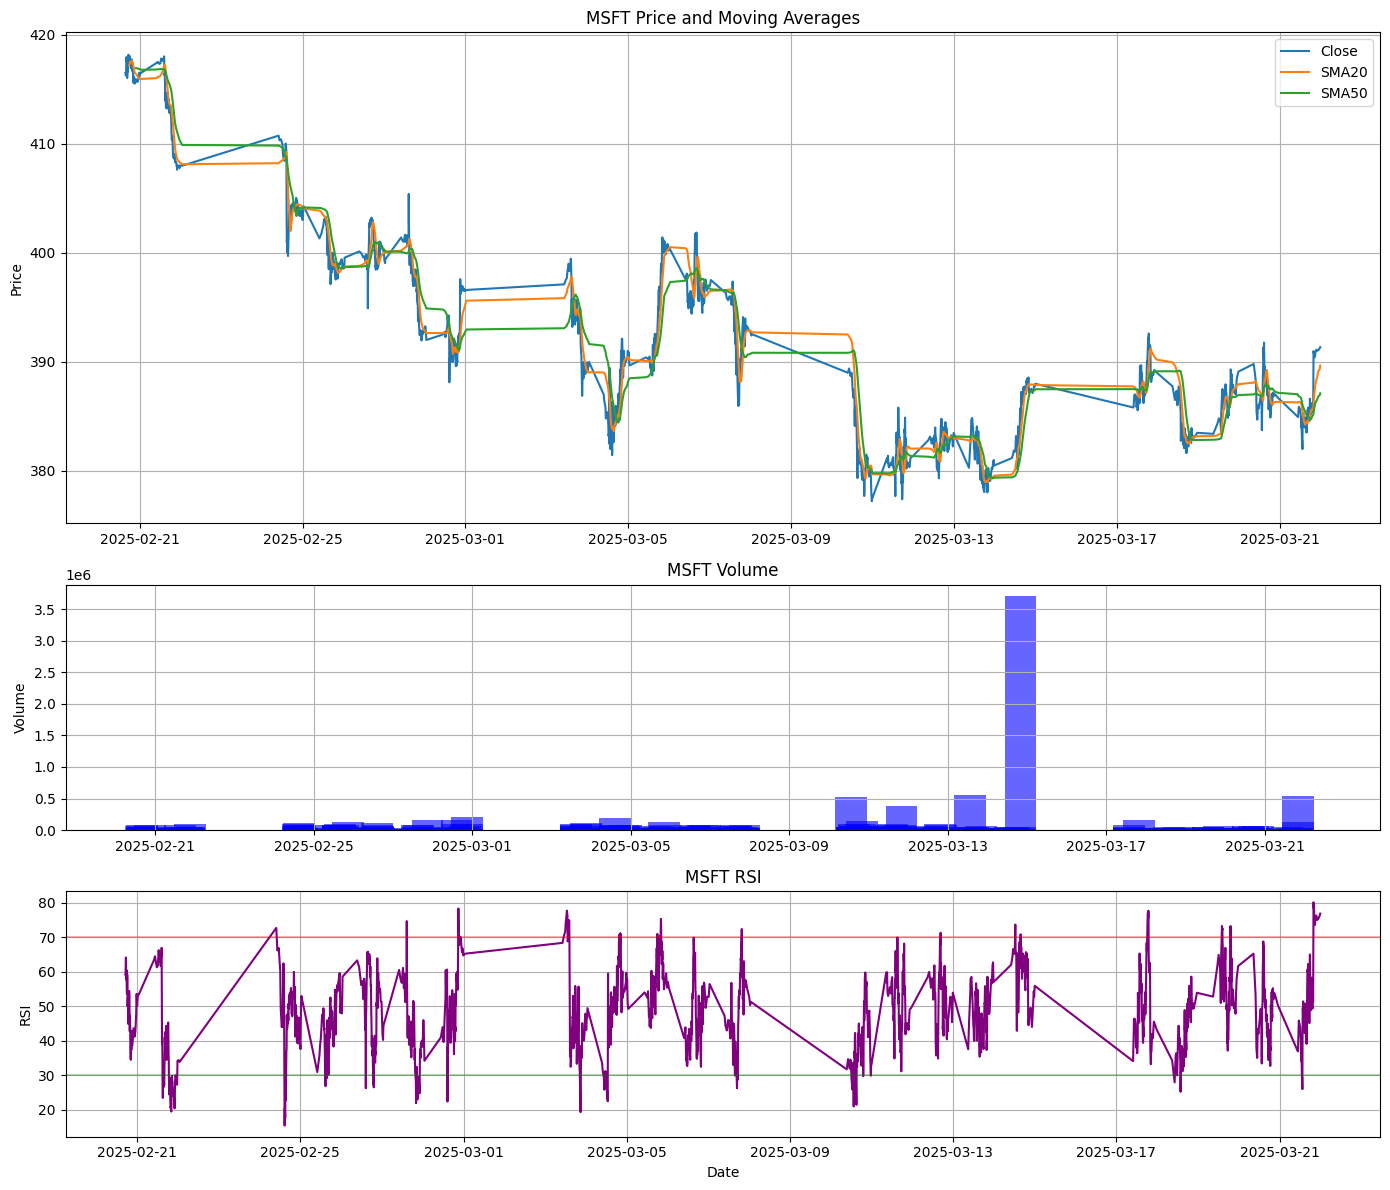

In [42]:
# Function to create a dashboard for a symbol
def symbol_dashboard(symbol, start_date=None, end_date=None, max_points=2000):
    # Get the data
    daily_data = chronos.get_candles(symbol=symbol, interval="OneMinute")
    
    # If dates are provided, filter the data
    if start_date:
        # Convert naive datetime to UTC timezone-aware datetime
        if not hasattr(start_date, 'tzinfo') or start_date.tzinfo is None:
            start_date = pd.Timestamp(start_date).tz_localize('UTC')
        daily_data = daily_data[daily_data['start'] >= start_date]
    if end_date:
        # Convert naive datetime to UTC timezone-aware datetime
        if not hasattr(end_date, 'tzinfo') or end_date.tzinfo is None:
            end_date = pd.Timestamp(end_date).tz_localize('UTC')
        daily_data = daily_data[daily_data['start'] <= end_date]
    
    # If we have too many data points, resample to reduce load
    if len(daily_data) > max_points:
        # Calculate appropriate sampling frequency
        sample_factor = len(daily_data) // max_points + 1
        daily_data = daily_data.iloc[::sample_factor].copy()
    
    # Add technical indicators
    # SMA
    daily_data['sma20'] = SMAIndicator(close=daily_data['close'], window=20).sma_indicator()
    daily_data['sma50'] = SMAIndicator(close=daily_data['close'], window=50).sma_indicator()
    
    # RSI
    daily_data['rsi'] = RSIIndicator(close=daily_data['close']).rsi()
    
    # MACD
    macd = MACD(close=daily_data['close'])
    daily_data['macd'] = macd.macd()
    daily_data['macd_signal'] = macd.macd_signal()
    daily_data['macd_diff'] = macd.macd_diff()
    
    # Create the dashboard with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1, 1]})
    
    # Plot 1: Price and Moving Averages
    ax1.plot(daily_data['start'], daily_data['close'], label='Close')
    ax1.plot(daily_data['start'], daily_data['sma20'], label='SMA20')
    ax1.plot(daily_data['start'], daily_data['sma50'], label='SMA50')
    ax1.set_title(f'{symbol} Price and Moving Averages')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Volume
    ax2.bar(daily_data['start'], daily_data['volume'], color='blue', alpha=0.6)
    ax2.set_title(f'{symbol} Volume')
    ax2.set_ylabel('Volume')
    ax2.grid(True)
    
    # Plot 3: RSI
    ax3.plot(daily_data['start'], daily_data['rsi'], color='purple')
    ax3.axhline(y=70, color='r', linestyle='-', alpha=0.3)
    ax3.axhline(y=30, color='g', linestyle='-', alpha=0.3)
    ax3.set_title(f'{symbol} RSI')
    ax3.set_ylabel('RSI')
    ax3.set_xlabel('Date')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return daily_data

# Create a dashboard for AAPL
# You can specify date range to limit data points
# Example: last 30 days
from datetime import datetime, timedelta
end_date = datetime.now()
start_date = end_date - timedelta(days=30)
aapl_dashboard_data = symbol_dashboard("MSFT", start_date=start_date, end_date=end_date)

In [ ]:

# %%


# %% [markdown]
# 
# 
# 

# %%






# %% [markdown]
# 
# 
# 

# %%

```

This notebook provides a comprehensive guide to using the Chronos component of the QuestradeAPI. It covers key functionalities including:

1. Symbol information management and caching
2. Bulk operations for efficient symbol data handling
3. Market data (candles) retrieval with intelligent caching
4. Data update strategies that minimize API calls
5. Advanced database queries for custom date ranges
6. Retrieval of all market data for comprehensive analysis
7. Database maintenance operations
8. Preparation of data for machine learning with AutoGluon
9. Enhancement with technical indicators
10. Building a simple dashboard to visualize key metrics

Each section includes detailed code examples and explanations to help you understand how to use Chronos effectively for financial data management.
